**Importing essential Libraries**

In [22]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import numpy as np 


**Data Pre-Processing**

To train the model we are using the text from the book “Poirot Investigates” by Agatha Christie. The book is loaded into google colab with the name book.txt. For pre-processing the data, first we are replacing all the '--' with ' '(spaces) in our text, Next we will remove punctuations and at last we are converting all the words to lower letters. At the end we are converting every string, text into list of tokens.

In [21]:
import string
tokenizer = Tokenizer()

data = open("book.txt").read()
data=data.replace('--',' ')
#converting each word to lower and split the tokens by white spaces
#remove punctuations from each tokens
table=str.maketrans('','',string.punctuation)
data=[w.translate(table) for w in data]
data=''.join(data)
corpus=data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'to': 2, 'a': 3, 'of': 4, 'and': 5, 'i': 6, 'in': 7, 'was': 8, 'he': 9, 'you': 10, 'that': 11, 'it': 12, 'is': 13, 'his': 14, 'with': 15, 'poirot': 16, 'not': 17, 'had': 18, 'at': 19, 'as': 20, 'on': 21, 'my': 22, 'have': 23, 'for': 24, 'we': 25, 'but': 26, 'be': 27, 'me': 28, 'him': 29, 'her': 30, 'from': 31, 'this': 32, 'said': 33, 'one': 34, 'by': 35, 'all': 36, 'she': 37, 'been': 38, 'were': 39, 'there': 40, 'or': 41, 'no': 42, 'will': 43, 'do': 44, '“i': 45, 'an': 46, 'are': 47, 'mr': 48, 'they': 49, 'out': 50, 'man': 51, 'up': 52, 'so': 53, 'what': 54, 'then': 55, 'if': 56, 'your': 57, 'which': 58, 'would': 59, 'about': 60, 'little': 61, 'did': 62, 'us': 63, 'has': 64, 'must': 65, 'any': 66, 'see': 67, 'some': 68, 'our': 69, 'who': 70, '“you': 71, 'when': 72, 'into': 73, '•': 74, 'project': 75, 'friend': 76, 'know': 77, 'very': 78, 'down': 79, 'mrs': 80, 'now': 81, 'them': 82, 'door': 83, 'time': 84, 'two': 85, 'just': 86, 'can': 87, 'hastings': 88, 'could': 89, '“but'

For input and output we are Transforming each text in texts to a sequence of integers. We are taking sequence of 5 words as input and predicting the next words(6th word). At the end we are converting one-hot ending all the lebels.

In [27]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[i-5:i+1]
		#print(n_gram_sequence)
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

**Building a Model**

In [30]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=0, mode='auto')
callbacks = [EarlyStopping(monitor='loss',patience=3)]
model.summary()
print(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 100)            784100    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               34048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 7841)              509665    
                                                                 
Total params: 1,327,813
Trainable params: 1,327,813
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Training**

In [31]:
history = model.fit(xs, ys, batch_size=64,epochs=100, verbose=1,callbacks=callbacks)

Epoch 1/100
780/780 [==============================] - 22s 18ms/step - loss: 4.3975 - accuracy: 0.4202
Epoch 2/100
780/780 [==============================] - 14s 18ms/step - loss: 3.7683 - accuracy: 0.4437
Epoch 3/100
780/780 [==============================] - 14s 18ms/step - loss: 3.2998 - accuracy: 0.4656
Epoch 4/100
780/780 [==============================] - 13s 17ms/step - loss: 2.7896 - accuracy: 0.4994
Epoch 5/100
780/780 [==============================] - 13s 17ms/step - loss: 2.3129 - accuracy: 0.5512
Epoch 6/100
780/780 [==============================] - 13s 17ms/step - loss: 1.9346 - accuracy: 0.6102
Epoch 7/100
780/780 [==============================] - 13s 17ms/step - loss: 1.6585 - accuracy: 0.6603
Epoch 8/100
780/780 [==============================] - 13s 17ms/step - loss: 1.4689 - accuracy: 0.6939
Epoch 9/100
780/780 [==============================] - 13s 17ms/step - loss: 1.3329 - accuracy: 0.7194
Epoch 10/100
780/780 [==============================] - 13s 17ms/step - l

In [34]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.title(string)
  plt.show()

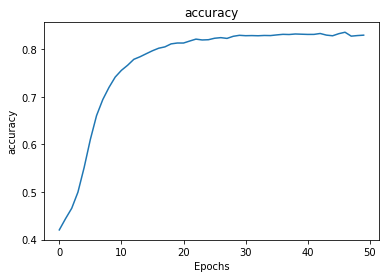

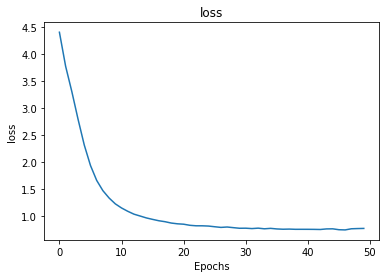

In [36]:
plot_graphs(history, 'accuracy')
plot_graphs(history,'loss')

**Saving the model**

In [37]:
model.save('content/Language_model.h5')
print("saved the model")

saved the model


**Reloading with the load_model function:**

In [38]:
model_loaded = load_model("content/Language_model.h5")

**Testing:**
Prdicting next 10 words

In [40]:
seed_text = "satish will"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model_loaded.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

satish will aid you” my friend i passed briskly in a while
